<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Library importing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange, repeat

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

from flayers.layers import GaborLayer

## Data loading

> We will be using MNIST for a simple and quick test.

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = repeat(X_train, "b h w ->  b h w c", c=1)/255.0
X_test = repeat(X_test, "b h w ->  b h w c", c=1)/255.0

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

## Definition of simple model

In [ ]:
n_gabors = 4
sigma_i = [0.1, 0.2]*2
sigma_j = [0.2, 0.1]*2
freq = [10, 10]*2
theta = [0, np.pi/2]*2
rot_theta = [0, 0]*2
sigma_theta = [0, 0]*2

In [ ]:
model = tf.keras.Sequential([
    GaborLayer(n_gabors=n_gabors, size=20, imean=0.5, jmean=0.5, sigma_i=sigma_i, sigma_j=sigma_j, freq=freq, 
               theta=theta, rot_theta=rot_theta, sigma_theta=sigma_theta, fs=20, input_shape=(28,28,1)),
    layers.MaxPool2D(2),
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gabor_layer_1 (GaborLayer)   (None, 28, 28, 4)         1626      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                50        
Total params: 1,676
Trainable params: 76
Non-trainable params: 1,600
_________________________________________________________________


We can show the initial Gabor filters:

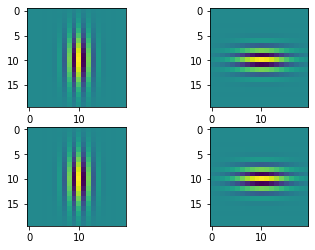

In [ ]:
model.layers[0].show_filters()

In [ ]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=1, validation_split=0.2)

375/375 [==============================] - 17s 33ms/step - loss: 2.2897 - accuracy: 0.1481 - val_loss: 2.2693 - val_accuracy: 0.1996


We can visualize the gabor filters after the training process:

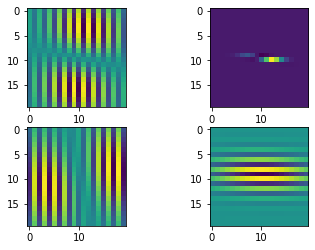

In [ ]:
model.layers[0].show_filters()

We can even check the atributes of the layer to inspect the change in the initial parameters:

In [ ]:
model.layers[0].theta.numpy()*180/np.pi

array([-1.3238928, 90.20859  , -2.235493 , 88.482956 ], dtype=float32)

In [ ]:
model.layers[0].rot_theta.numpy()*180/np.pi

array([-1.3243861 ,  0.27530777,  2.329611  , -1.5420123 ], dtype=float32)

In [ ]:
model.layers[0].sigma_theta.numpy()*180/np.pi

array([-1.3520143, -4.6940336,  5.102634 , -1.5307682], dtype=float32)